In [1]:
from pymongo import MongoClient
import pandas as pd
import json
from mongo_queries import offices_nearto
from mongo_queries import intersection
from folium import Map, Marker, Icon, FeatureGroup, LayerControl, Choropleth
from folium.plugins import HeatMap
from folium.vector_layers import Circle, Polygon

In [2]:
client = MongoClient()
db = client.get_database("companies")

In [3]:
comp = db.companies

In [4]:
# I unwind to create a new collection:
res = comp.aggregate([
                      {"$unwind":"$offices" },
                      {"$match":{"offices.latitude":{"$ne":None}}},
                      {"$match":{"offices.longitude":{"$ne":None}}},
                      {"$project":{"_id":0}} 
                     ])

In [5]:
db.companies_unwinded.insert_many(res)

In [6]:
offices = db.companies_unwinded

In [7]:
res = offices.find({},{"offices":1})

In [8]:
# I create a new field with the coordinates:
for c in res:
    filt = {"_id":c["_id"]}
    coord = {
              "type": "Point",
              "coordinates": [c["offices"]["longitude"], c["offices"]["latitude"]]
            }
    update = {"$set":{"coord":coord}}
    offices.update_one(filt,update)

I create a new index in MongoDB:

<div>
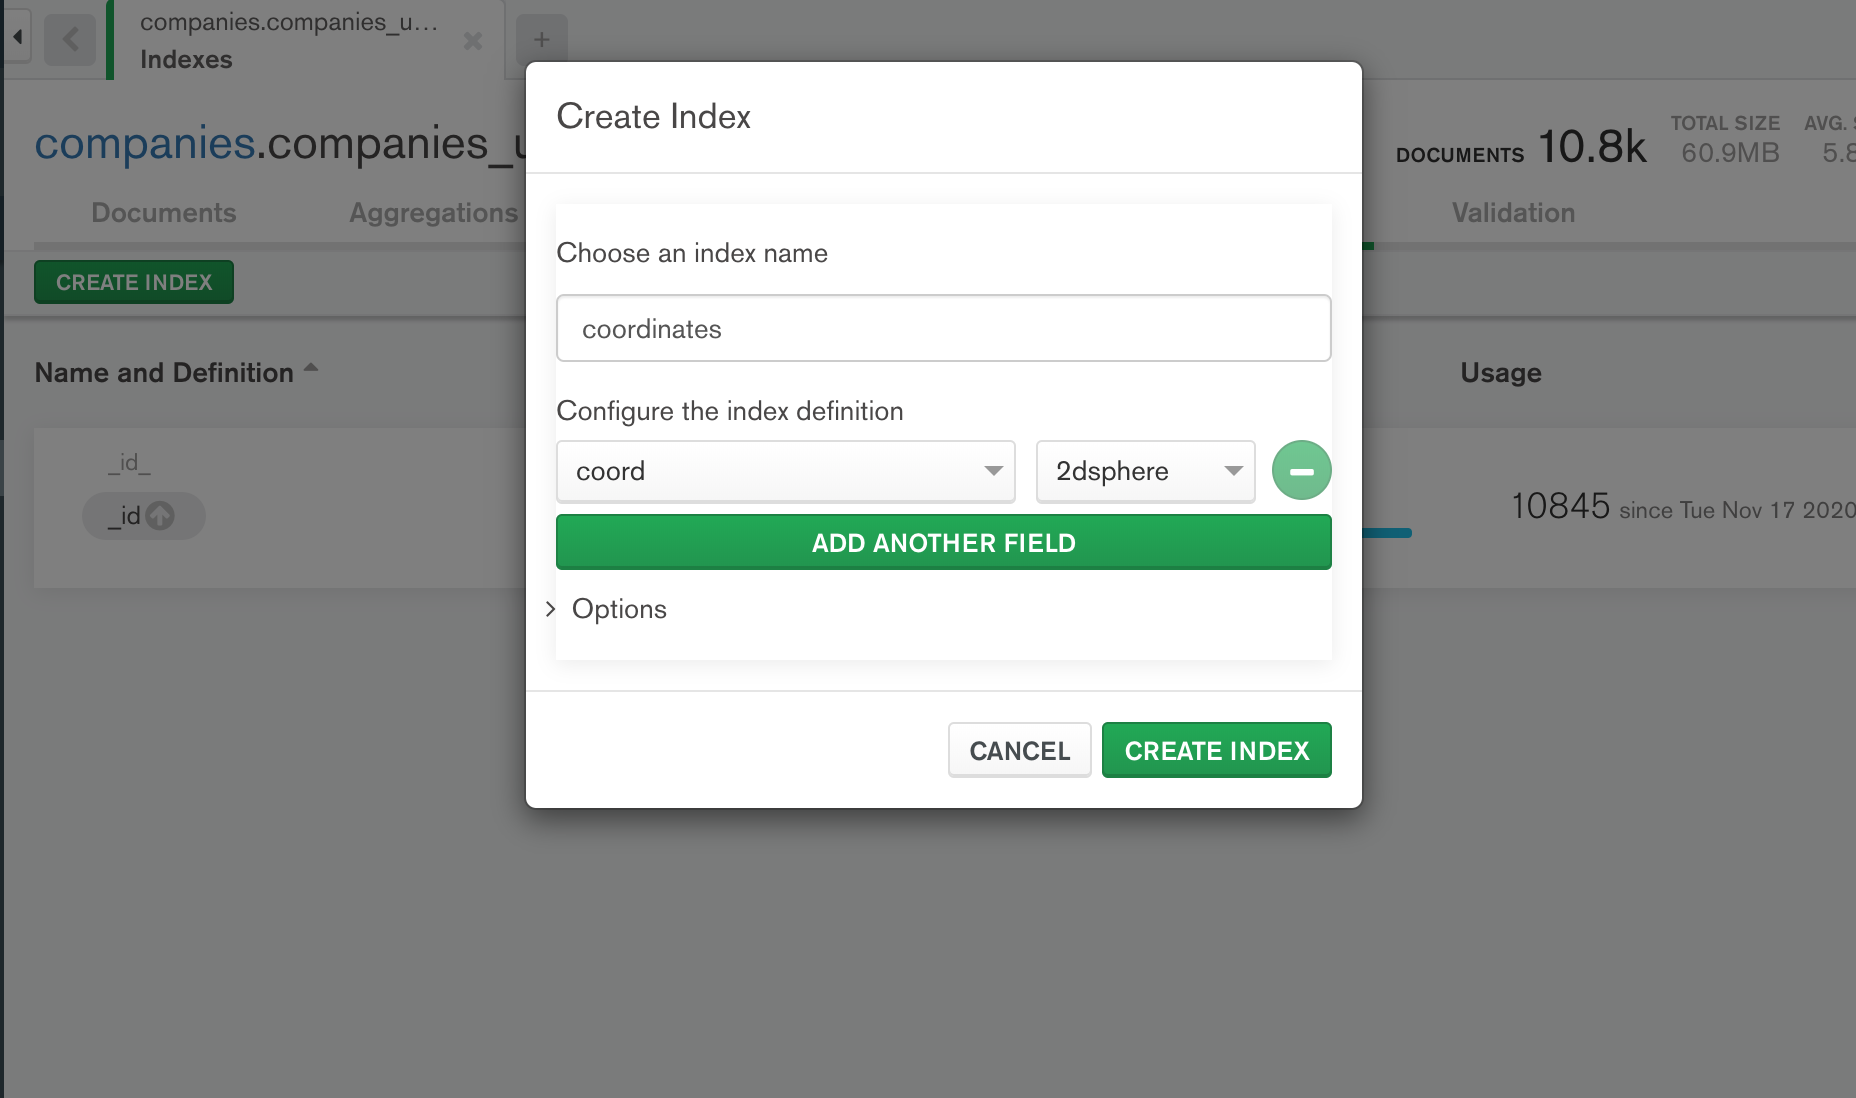
</div>



In [9]:
df_basket=pd.read_csv('data/basket_stadium.csv')

In [10]:
offices_basket=offices_nearto(df_basket,10000,"stadium",offices)

In [11]:
len(offices_basket)

961

In [12]:
df_dog=pd.read_csv('data/dog_hairdressers.csv')

In [47]:
offices_dog=offices_nearto(df_dog,1000,"dog_hairdresser",offices)

In [48]:
len(offices_dog)

313

In [15]:
df_kindergartens=pd.read_csv('data/kindergartens.csv')

In [49]:
offices_kindergartens=offices_nearto(df_kindergartens,2000,"kindergarten",offices)

In [50]:
len(offices_kindergartens)

18

In [18]:
df_party_clubs=pd.read_csv('data/party_clubs.csv')

In [86]:
offices_party_clubs=offices_nearto(df_party_clubs,3000,"party_club",offices)

In [87]:
len(offices_party_clubs)

303

In [88]:
df_starbucks=pd.read_csv('data/starbucks.csv')

In [89]:
offices_starbucks=offices_nearto(df_starbucks,300,"starbuck",offices)

In [90]:
len(offices_starbucks)

30

In [91]:
df_vegan_food=pd.read_csv('data/vegan_food.csv')

In [92]:
offices_vegan_food=offices_nearto(df_vegan_food,300,"vegan_food",offices)

In [93]:
len(offices_vegan_food)

50

First of all I get the intersection between those lists of offices more low:

In [94]:
intersection(offices_kindergartens,offices_starbucks)

['5fb37a7496f220fa8648e080']

In [95]:
intersection(offices_kindergartens,offices_vegan_food)

['5fb37a7496f220fa8648e266',
 '5fb37a7496f220fa8648c8c5',
 '5fb37a7496f220fa8648d54a']

In [96]:
intersection(offices_kindergartens,offices_party_clubs)

['5fb37a7496f220fa8648c365',
 '5fb37a7496f220fa8648e080',
 '5fb37a7496f220fa8648d54a',
 '5fb37a7496f220fa8648e487',
 '5fb37a7496f220fa8648c406',
 '5fb37a7496f220fa8648c8c5']

In [97]:
intersection(offices_vegan_food,offices_party_clubs)

['5fb37a7496f220fa8648d5b9',
 '5fb37a7396f220fa8648bf18',
 '5fb37a7496f220fa8648e677',
 '5fb37a7496f220fa8648d473',
 '5fb37a7496f220fa8648dc88',
 '5fb37a7496f220fa8648d5a1',
 '5fb37a7496f220fa8648d54a',
 '5fb37a7496f220fa8648c662',
 '5fb37a7496f220fa8648c344',
 '5fb37a7496f220fa8648d7fd',
 '5fb37a7496f220fa8648d4cb',
 '5fb37a7496f220fa8648c99d',
 '5fb37a7496f220fa8648dd59',
 '5fb37a7496f220fa8648d947',
 '5fb37a7496f220fa8648c8c5',
 '5fb37a7496f220fa8648c68c']

In [98]:
intersection(offices_vegan_food,offices_starbucks)

['5fb37a7496f220fa8648d473',
 '5fb37a7496f220fa8648dc88',
 '5fb37a7496f220fa8648d7fd',
 '5fb37a7496f220fa8648e677']

In [99]:
intersection(offices_basket,offices_starbucks)

['5fb37a7496f220fa8648e576',
 '5fb37a7496f220fa8648e080',
 '5fb37a7496f220fa8648d204',
 '5fb37a7396f220fa8648bdb8',
 '5fb37a7496f220fa8648e0c4',
 '5fb37a7496f220fa8648c484',
 '5fb37a7496f220fa8648d86b',
 '5fb37a7496f220fa8648c803',
 '5fb37a7496f220fa8648c475',
 '5fb37a7496f220fa8648cc90',
 '5fb37a7496f220fa8648d3b8',
 '5fb37a7496f220fa8648d473',
 '5fb37a7496f220fa8648d02a',
 '5fb37a7496f220fa8648c1a3',
 '5fb37a7496f220fa8648df74',
 '5fb37a7496f220fa8648d7fd',
 '5fb37a7496f220fa8648c931',
 '5fb37a7496f220fa8648c512',
 '5fb37a7496f220fa8648dc88',
 '5fb37a7496f220fa8648e79a',
 '5fb37a7496f220fa8648c1ec',
 '5fb37a7496f220fa8648c700',
 '5fb37a7496f220fa8648e677']

In [100]:
intersection(offices_dog,offices_starbucks)

['5fb37a7496f220fa8648e0c4',
 '5fb37a7496f220fa8648c484',
 '5fb37a7496f220fa8648c512',
 '5fb37a7496f220fa8648c803',
 '5fb37a7496f220fa8648c1a3',
 '5fb37a7496f220fa8648e79a',
 '5fb37a7496f220fa8648e576',
 '5fb37a7496f220fa8648e080',
 '5fb37a7496f220fa8648c475',
 '5fb37a7496f220fa8648df74',
 '5fb37a7496f220fa8648c931',
 '5fb37a7396f220fa8648bdb8']

In [ ]:
intersection(offices_kindergartens,offices_starbucks)

This is the office with 5fb37a7496f220fa8648e080 more frequency in the intersections. I check in Mongo and the coordinates are [34.1036353, -118.293316]

In [101]:
m = Map(location=[34.1036353, -118.293316],zoom_start=4)
for i, row in df_kindergartens.iterrows():
    city = {
        "location":json.loads(row["kindergarten"]),
        "popup":"kindergarten",
        "tooltip":row["city"]
    }
    ic = Icon(color="blue",
              prefix="fa",
              icon="child")
    Marker(**city, icon=ic).add_to(m)

In [102]:
m